### Тестовое задание на позицию *Data Scientist* в *Vizor Games*. Выполнил *Каптуров Александр*

![](https://vizor-games.com/wp-content/uploads/2022/05/games_1-c-1840x880-1.jpg)

#### Описание данных:

Даны два датасета: **train_data** и **test_data**. Первый предназначен для обучения модели
и содержит целевую переменную **target**, второй датасет предназначен для скоринга и
дальнейшей проверки качества обученной модели (в нем отсутствует поле target).
Датасеты содержат данные, описывающие некоторые атрибуты пользователя и его
поведение в мобильном приложении.

В наборе содержаться данных следующие группы полей:

- ID – идентификатор пользователя

- группа полей cat_ - категориальные переменные, категории которых
закодированы в целочисленные значения. Целочисленное значение отражает
только принадлежность к категории, порядок значений не предполагается, что
несет дополнительную информацию.

- группа полей num_ - числовые переменные. Значения -1 в данных
переменных — результат импутации пропущенных значений.

- target – целевая переменная

In [1]:
# 1 - Импортируем необходимые библиотеки
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score, precision_score, recall_score

In [2]:
# 2 - откроем тренировочный датасет
train = pd.read_csv('E:\Kaggle\Visor Games for Data Scientist\\train_data.csv')
train.head()

,ID,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,num_0,num_7,num_36,...,num_32,num_30,num_50,num_14,num_37,num_46,num_12,num_18,num_16,target
0,363500,54,8,682,4,1325,2,11.677298,0.0,11.8748,...,147.0,1.0,66.0,112552.0,152.0,1.000000,1.000000,1.000000,1,7.223350
1,77605,68,8,682,4,1334,2,NaN,0.0,0.0000,...,203.0,1.0,33.0,86131.0,234.0,1.000000,1.000000,1.000000,1,0.000000
2,23410,205,8,682,4,1276,3,NaN,0.0,0.0000,...,168.0,1.0,46.0,112968.0,163.0,1.000000,1.000000,1.000000,1,0.000000
3,119647,205,14,891,4,2964,2,NaN,0.0,0.0000,...,-1.0,0.0,3.0,279.0,-1.0,0.000000,0.000000,0.000000,1,0.000000
4,230755,207,0,682,0,1366,2,NaN,0.0,0.0000,...,143.0,1.0,22.0,86052.0,191.0,0.121375,0.123628,0.146802,0,3.765352


In [3]:
# 3 - отобразим список признаков
train.columns.tolist()

['ID',
 'cat_0',
 'cat_1',
 'cat_2',
 'cat_3',
 'cat_4',
 'cat_5',
 'num_0',
 'num_7',
 'num_36',
 'num_2',
 'num_24',
 'num_27',
 'num_1',
 'num_43',
 'num_39',
 'num_10',
 'num_23',
 'num_40',
 'num_22',
 'num_47',
 'num_38',
 'num_17',
 'num_35',
 'num_3',
 'num_52',
 'num_48',
 'num_53',
 'num_28',
 'num_4',
 'num_21',
 'num_42',
 'num_54',
 'num_5',
 'num_34',
 'num_6',
 'num_44',
 'num_20',
 'num_19',
 'num_11',
 'num_15',
 'num_8',
 'num_25',
 'num_33',
 'num_45',
 'num_51',
 'num_31',
 'num_49',
 'num_26',
 'num_13',
 'num_41',
 'num_9',
 'num_29',
 'num_32',
 'num_30',
 'num_50',
 'num_14',
 'num_37',
 'num_46',
 'num_12',
 'num_18',
 'num_16',
 'target']

In [4]:
# 4 - посмотрим тип данных (как видим тип везде целочисленный)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145906 entries, 0 to 145905
Data columns (total 63 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      145906 non-null  int64  
 1   cat_0   145906 non-null  int64  
 2   cat_1   145906 non-null  int64  
 3   cat_2   145906 non-null  int64  
 4   cat_3   145906 non-null  int64  
 5   cat_4   145906 non-null  int64  
 6   cat_5   145906 non-null  int64  
 7   num_0   7448 non-null    float64
 8   num_7   145906 non-null  float64
 9   num_36  145906 non-null  float64
 10  num_2   145906 non-null  float64
 11  num_24  7448 non-null    float64
 12  num_27  22855 non-null   float64
 13  num_1   145906 non-null  float64
 14  num_43  145906 non-null  float64
 15  num_39  119023 non-null  float64
 16  num_10  67710 non-null   float64
 17  num_23  145906 non-null  float64
 18  num_40  145906 non-null  float64
 19  num_22  145906 non-null  float64
 20  num_47  145906 non-null  float64
 21  num_38  13

In [5]:
# 5 - рассмотрим размерность тренировочного датасета
train.shape

(145906, 63)

In [6]:
# 6 - проверим количество пропусков в каждом признаке
pd.set_option('min_rows', 100)
print(train.isna().sum())
print()
print(train[['num_21', 'num_42', 'num_54']].isna().sum())

ID             0
cat_0          0
cat_1          0
cat_2          0
cat_3          0
cat_4          0
cat_5          0
num_0     138458
num_7          0
num_36         0
num_2          0
num_24    138458
num_27    123051
num_1          0
num_43         0
num_39     26883
num_10     78196
num_23         0
num_40         0
num_22         0
num_47         0
num_38      8719
num_17         0
num_35         0
num_3          0
num_52         0
num_48         0
num_53         0
num_28         0
num_4          0
           ...  
num_5          0
num_34         0
num_6          0
num_44         0
num_20         0
num_19         0
num_11         0
num_15         0
num_8          0
num_25         0
num_33         0
num_45         0
num_51         0
num_31         0
num_49         0
num_26         0
num_13         0
num_41         0
num_9          0
num_29         0
num_32         0
num_30         0
num_50         0
num_14         0
num_37         0
num_46         0
num_12         0
num_18        

In [7]:
# 7 - Как видим, существует всего 6 столбцов, имеющие пропуски в данных. Соберем их в отдельную переменную
gaps = ['num_0', 'num_24', 'num_27', 'num_39', 'num_10', 'num_38']
train[gaps].isna().sum()

num_0     138458
num_24    138458
num_27    123051
num_39     26883
num_10     78196
num_38      8719
dtype: int64

In [8]:
# 8 - рассмотрим долю пропущенных значений
train[gaps].isna().sum() / train.shape[0]

num_0     0.948953
num_24    0.948953
num_27    0.843358
num_39    0.184249
num_10    0.535934
num_38    0.059758
dtype: float64

*num_38 и num_39 содеражат небольшую долю пропусков, а вот доля пропусков других столбцов высокая. Вообще существует 6 основных способов импутации данных, [подробнее по ссылке](https://tproger.ru/translations/data-imputation/). Авторы тестового задания предложили константное -1 для заполнения некоторых пропущенных значений в столцах.*

In [9]:
# 9 - удалим столбцы содержащие более 50% пропусков
train.drop(columns=['num_0', 'num_24', 'num_27', 'num_10'], axis=1, inplace=True)

In [10]:
# 10 - посмотрим на распределение значений столбцов num_38 и num_39
import scipy.stats as stats

result = stats.shapiro(train['num_38'])
print(f'Shapiro-Wilk test statistic for num_38: {result[0]:.4f}')
print(f'p-value: {result[1]}')

result = stats.shapiro(train['num_39'])
print(f'Shapiro-Wilk test statistic for num_39: {result[0]:.4f}')
print(f'p-value: {result[1]}')

Shapiro-Wilk test statistic for num_38: nan
p-value: 1.0
Shapiro-Wilk test statistic for num_39: nan
p-value: 1.0


E:\Multimedia\Anaconda\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Тест Шапиро-Уилка работает не точно при размере выборки более 5000 записей, поэтому мы не может гарантировать, что распределние действительно нормальное

(0.0, 15000.0)

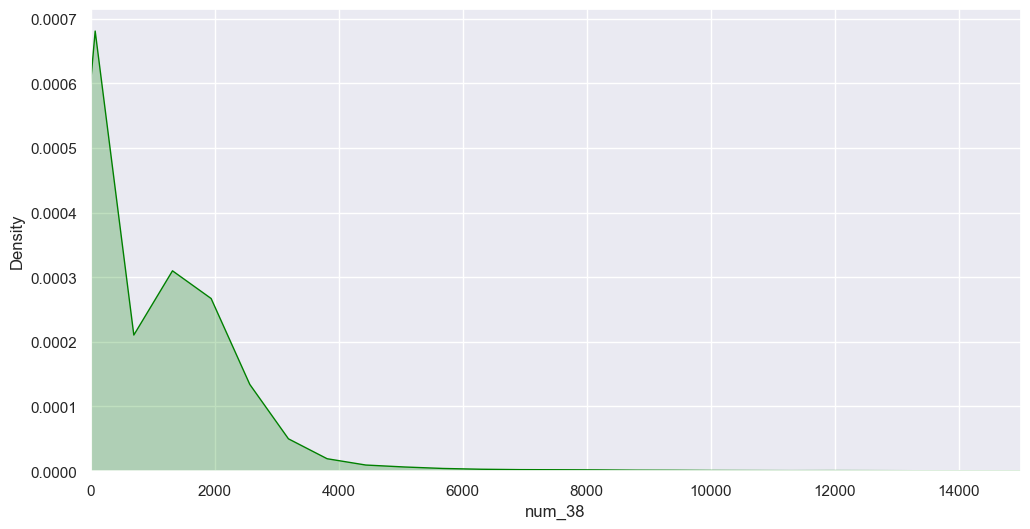

In [11]:
# 11 - убеждаемся, что распределение признака num_38 не является нормальным
sns.set(rc={'figure.figsize': (12, 6)})
sns.kdeplot(train['num_38'], fill=True, color='green');
plt.xlim([0, 15000])

(0.0, 2000.0)

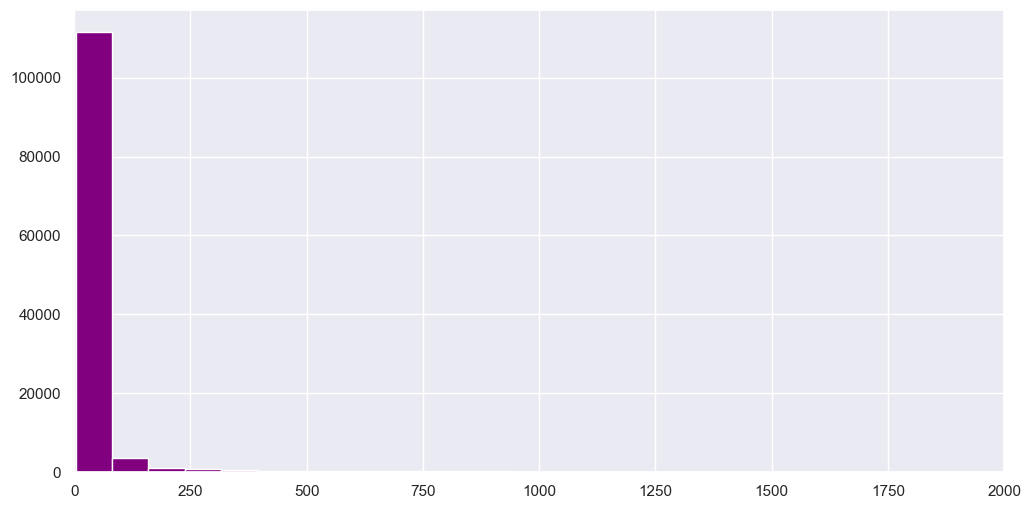

In [12]:
# 12 - с помощью гистограммы убеждаемся, что распределение признака 'num_39' ненормальное
train['num_39'].hist(bins=200, color='purple');
plt.xlim([0, 2000])

### Т.к. распределение признаков num_38 и num_39 не является нормальным, то заполним пропущенные значения в них с помощью медианы

In [13]:
# 13 - заполняем пропущенные значение медианами и убеждаемся, что пропусков больше нету
train['num_38'].fillna(train['num_38'].median(), inplace=True)
train['num_39'].fillna(train['num_39'].median(), inplace=True)
train[['num_38', 'num_39']].isna().sum()

num_38    0
num_39    0
dtype: int64

In [14]:
# 14 - построим тепловую карту признаков датасета
correlation = train.corr()
cor = correlation.style.background_gradient(cmap='coolwarm');
cor

,ID,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,num_7,num_36,num_2,num_1,num_43,num_39,num_23,num_40,num_22,num_47,num_38,num_17,num_35,num_3,num_52,num_48,num_53,num_28,num_4,num_21,num_42,num_54,num_5,num_34,num_6,num_44,num_20,num_19,num_11,num_15,num_8,num_25,num_33,num_45,num_51,num_31,num_49,num_26,num_13,num_41,num_9,num_29,num_32,num_30,num_50,num_14,num_37,num_46,num_12,num_18,num_16,target
ID,1.000000,0.003642,0.131983,-0.047465,0.006222,0.049244,0.009849,0.006441,0.005635,0.008071,0.031552,0.031700,0.008419,0.015835,0.008282,0.015997,0.007401,0.031051,0.044379,0.009869,0.043581,0.000895,0.003197,0.007960,0.006819,0.005612,0.043570,0.038355,0.032059,-0.050644,0.041219,0.005520,0.039167,0.041016,0.034751,0.026948,0.008763,0.019507,0.005306,0.000555,0.017059,-0.000584,0.010475,0.020775,0.019894,0.013957,0.021392,0.005829,0.023331,0.005654,0.037571,0.044491,0.027357,0.016606,0.029324,0.029191,0.029824,-0.072508,0.018616
cat_0,0.003642,1.000000,-0.033047,-0.049559,-0.044053,0.053231,-0.064426,0.027223,0.023301,0.034238,0.037105,0.036763,0.033433,0.032334,0.029080,0.022608,0.022443,0.036787,0.030201,0.030242,0.030325,-0.000618,0.011990,0.028797,0.015393,0.029398,0.029975,0.034100,0.017333,-0.010770,0.026677,0.005359,0.007167,0.023584,0.020334,0.025425,0.028530,0.007170,0.005281,-0.002733,0.006098,-0.001893,0.009047,0.002028,0.001066,0.000981,-0.001593,0.002400,0.010277,0.010927,0.019744,0.024093,0.008274,0.016529,0.008521,0.007754,0.008729,-0.053047,0.040695
cat_1,0.131983,-0.033047,1.000000,0.328885,0.641920,-0.374573,-0.063584,-0.000685,0.002228,-0.003765,0.001621,0.001149,0.001938,0.023198,0.004994,0.021393,0.004074,0.015894,0.022145,0.007805,0.022372,-0.002645,0.003067,0.004306,0.003049,0.001907,0.022262,0.014923,0.018959,-0.017426,0.036965,0.019052,0.011050,0.013257,0.017587,0.005909,0.003049,0.008699,-0.001490,0.004234,0.008698,0.005291,0.009792,0.007355,0.009930,-0.000527,0.005138,0.004646,0.010373,0.018162,0.010272,0.013701,0.009519,0.025027,0.012565,0.012699,0.010638,0.612782,0.020366
cat_2,-0.047465,-0.049559,0.328885,1.000000,0.344186,-0.395743,-0.122834,-0.013146,-0.012686,-0.018626,-0.032504,-0.032961,-0.017612,-0.005066,-0.012920,-0.004868,-0.012692,-0.036181,-0.043538,-0.013188,-0.042758,-0.003215,-0.008768,-0.012999,-0.014543,-0.013935,-0.042394,-0.042005,-0.024847,0.050981,-0.025065,0.000156,-0.034703,-0.047966,-0.026265,-0.023932,-0.013850,-0.021028,-0.010430,0.000128,-0.019970,0.001002,-0.010494,-0.020350,-0.020120,-0.015938,-0.022553,-0.009616,-0.011662,-0.004651,-0.047839,-0.049034,-0.029850,-0.014064,-0.031962,-0.031669,-0.031890,0.555944,-0.024881
cat_3,0.006222,-0.044053,0.641920,0.344186,1.000000,-0.431264,-0.033753,0.014424,0.011567,0.024376,0.004176,0.003591,0.018569,0.055625,0.019400,0.052774,0.031329,0.025002,0.022050,0.023907,0.021757,-0.000446,0.004719,0.018413,0.008962,0.017670,0.021866,0.024376,0.011192,-0.014106,0.041120,0.021679,0.011534,0.017594,0.016655,0.013347,0.019441,0.013554,-0.004759,0.002347,0.009359,0.009849,0.011398,0.014994,0.011415,0.001401,-0.001299,0.006395,0.006728,0.032779,0.016554,0.015606,0.008893,0.038831,0.005364,0.004261,0.002120,0.699279,0.041611
cat_4,0.049244,0.053231,-0.374573,-0.395743,-0.431264,1.000000,0.151085,0.005786,0.003590,0.007845,0.028061,0.028543,0.006508,-0.012009,0.002631,-0.008614,0.000981,0.016490,0.027724,0.001558,0.027236,0.011289,0.005267,0.002952,0.008358,0.003359,0.027824,0.025609,0.013161,-0.045144,0.002683,-0.010468,0.026420,0.034176,0.015633,0.014133,0.004309,0.017460,0.005762,-0.000577,0.009205,0.003129,0.008796,0.015081,0.013770,0.012422,0.017762,0.000545,0.006389,-0.007083,0.030308,0.035039,0.018551,-0.003584,0.020765,0.020611,0.021343,-0.606526,0.014167
cat_5,0.009849,-0.064426,-0.063584,-0.122834,-0.033753,0.151085,1.000000,0.012025,0.013552,0.013238,0.010668,0.011034,0.015988,-0.009210,0.009948,-0.006898,-0.004459,0.011320,0.010252,0.008366,0.010088,0.011362,0.001496,0.010035,0.006053,0.012504,0.011201,0.012179,-0.001788,-0.009046,0.020711,

In [15]:
# 15 - отдельно проверим признаки имеющие высокую корреляцию (более 0.7)
high_correlation = ['num_7', 'num_36', 'num_1', 'num_43', 'num_39', 'num_23', 'num_40', 'num_38', 'num_17', 'num_35',
                    'num_3', 'num_53', 'num_4', 'num_21', 'num_42', 'num_54', 'num_9', 'num_30', 'num_50', 'num_14', 
                    'num_46', 'num_12', 'num_18']
correlation = train[high_correlation].corr()
cor = correlation.style.background_gradient(cmap='viridis');
cor

,num_7,num_36,num_1,num_43,num_39,num_23,num_40,num_38,num_17,num_35,num_3,num_53,num_4,num_21,num_42,num_54,num_9,num_30,num_50,num_14,num_46,num_12,num_18
num_7,1.000000,0.410124,0.055366,0.055223,0.705572,0.507761,0.657391,0.569386,0.298773,0.604499,0.298254,0.657536,0.349185,0.291439,0.483304,0.237559,0.009086,0.059109,0.231534,0.063209,0.071365,0.072463,0.072780
num_36,0.410124,1.000000,0.077222,0.077195,0.848307,0.482284,0.691465,0.699329,0.383992,0.624385,0.387126,0.692499,0.888232,0.377368,0.581114,0.323497,0.007157,0.068974,0.300455,0.080076,0.085579,0.087177,0.089044
num_1,0.055366,0.077222,1.000000,0.999837,0.118788,0.232700,0.100286,0.368779,0.564362,0.129186,0.547820,0.095685,0.105148,0.548819,0.463777,0.452362,0.072837,0.365049,0.586485,0.273266,0.456669,0.462048,0.474521
num_43,0.055223,0.077195,0.999837,1.000000,0.118655,0.232123,0.099991,0.368717,0.564609,0.128871,0.548001,0.095391,0.105057,0.549010,0.463797,0.453063,0.072855,0.364994,0.586592,0.273549,0.456567,0.461951,0.474439
num_39,0.705572,0.848307,0.118788,0.118655,1.000000,0.677521,0.878052,0.834694,0.482286,0.819228,0.482512,0.877358,0.783514,0.472091,0.715858,0.394958,0.015765,0.115004,0.390904,0.115093,0.140031,0.142190,0.144037
num_23,0.507761,0.482284,0.232700,0.232123,0.677521,1.000000,0.630912,0.724934,0.591602,0.676919,0.576927,0.620928,0.494034,0.569867,0.720969,0.476538,0.036807,0.271426,0.556677,0.198144,0.290903,0.293818,0.296463
num_40,0.657391,0.691465,0.100286,0.099991,0.878052,0.630912,1.000000,0.853769,0.459055,0.929843,0.458072,0.999628,0.650148,0.448256,0.731258,0.389357,0.008942,0.088623,0.358233,0.099497,0.109936,0.112367,0.115515
num_38,0.569386,0.699329,0.368779,0.368717,0.834694,0.724934,0.853769,1.000000,0.819443,0.820302,0.813735,0.849921,0.714375,0.804552,0.959534,0.643879,0.054431,0.422588,0.746925,0.276601,0.439271,0.439255,0.440519
num_17,0.298773,0.383992,0.564362,0.564609,0.482286,0.591602,0.459055,0.819443,1.000000,0.489837,0.997187,0.451268,0.427733,0.996431,0.919517,0.731396,0.085134,0.650742,0.949270,0.392465,0.659178,0.658106,0.659868
num_35,0.604499,0.624385,0.129186,0.128871,0.819228,0.676919,0.929843,0.820302,0.489837,1.000000,0.485783,0.921864,0.598360,0.476899,0.724829,0.416393,0.014610,0.119379,0.397703,0.119253,0.142347,0.144600,0.148410


### чтобы избавиться от мультиколлинеарности нужно удалить один из признаков в каждой паре, где коэффициент корреляции больше 0.7

In [16]:
# 16 - удалим следующие признаки, чтобы избавиться от мультиколлинеарности
multi_colin_problem = ['num_7', 'num_36', 'num_1', 'num_39', 'num_23', 'num_40', 'num_38', 'num_17', 'num_35',
                    'num_3', 'num_53','num_21','num_14', 'num_46', 'num_12']
train.drop(columns=multi_colin_problem, axis=1, inplace=True)

In [17]:
# 17 - проверим корреляцию оставшихся признаков
correlation = train.corr()
cor = correlation.style.background_gradient(cmap='plasma');
cor

,ID,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,num_2,num_43,num_22,num_47,num_52,num_48,num_28,num_4,num_42,num_54,num_5,num_34,num_6,num_44,num_20,num_19,num_11,num_15,num_8,num_25,num_33,num_45,num_51,num_31,num_49,num_26,num_13,num_41,num_9,num_29,num_32,num_30,num_50,num_37,num_18,num_16,target
ID,1.000000,0.003642,0.131983,-0.047465,0.006222,0.049244,0.009849,0.008071,0.031700,0.015997,0.007401,0.000895,0.003197,0.006819,0.005612,0.038355,0.032059,-0.050644,0.041219,0.005520,0.039167,0.041016,0.034751,0.026948,0.008763,0.019507,0.005306,0.000555,0.017059,-0.000584,0.010475,0.020775,0.019894,0.013957,0.021392,0.005829,0.023331,0.005654,0.037571,0.044491,0.016606,0.029824,-0.072508,0.018616
cat_0,0.003642,1.000000,-0.033047,-0.049559,-0.044053,0.053231,-0.064426,0.034238,0.036763,0.022608,0.022443,-0.000618,0.011990,0.015393,0.029398,0.034100,0.017333,-0.010770,0.026677,0.005359,0.007167,0.023584,0.020334,0.025425,0.028530,0.007170,0.005281,-0.002733,0.006098,-0.001893,0.009047,0.002028,0.001066,0.000981,-0.001593,0.002400,0.010277,0.010927,0.019744,0.024093,0.016529,0.008729,-0.053047,0.040695
cat_1,0.131983,-0.033047,1.000000,0.328885,0.641920,-0.374573,-0.063584,-0.003765,0.001149,0.021393,0.004074,-0.002645,0.003067,0.003049,0.001907,0.014923,0.018959,-0.017426,0.036965,0.019052,0.011050,0.013257,0.017587,0.005909,0.003049,0.008699,-0.001490,0.004234,0.008698,0.005291,0.009792,0.007355,0.009930,-0.000527,0.005138,0.004646,0.010373,0.018162,0.010272,0.013701,0.025027,0.010638,0.612782,0.020366
cat_2,-0.047465,-0.049559,0.328885,1.000000,0.344186,-0.395743,-0.122834,-0.018626,-0.032961,-0.004868,-0.012692,-0.003215,-0.008768,-0.014543,-0.013935,-0.042005,-0.024847,0.050981,-0.025065,0.000156,-0.034703,-0.047966,-0.026265,-0.023932,-0.013850,-0.021028,-0.010430,0.000128,-0.019970,0.001002,-0.010494,-0.020350,-0.020120,-0.015938,-0.022553,-0.009616,-0.011662,-0.004651,-0.047839,-0.049034,-0.014064,-0.031890,0.555944,-0.024881
cat_3,0.006222,-0.044053,0.641920,0.344186,1.000000,-0.431264,-0.033753,0.024376,0.003591,0.052774,0.031329,-0.000446,0.004719,0.008962,0.017670,0.024376,0.011192,-0.014106,0.041120,0.021679,0.011534,0.017594,0.016655,0.013347,0.019441,0.013554,-0.004759,0.002347,0.009359,0.009849,0.011398,0.014994,0.011415,0.001401,-0.001299,0.006395,0.006728,0.032779,0.016554,0.015606,0.038831,0.002120,0.699279,0.041611
cat_4,0.049244,0.053231,-0.374573,-0.395743,-0.431264,1.000000,0.151085,0.007845,0.028543,-0.008614,0.000981,0.011289,0.005267,0.008358,0.003359,0.025609,0.013161,-0.045144,0.002683,-0.010468,0.026420,0.034176,0.015633,0.014133,0.004309,0.017460,0.005762,-0.000577,0.009205,0.003129,0.008796,0.015081,0.013770,0.012422,0.017762,0.000545,0.006389,-0.007083,0.030308,0.035039,-0.003584,0.021343,-0.606526,0.014167
cat_5,0.009849,-0.064426,-0.063584,-0.122834,-0.033753,0.151085,1.000000,0.013238,0.011034,-0.006898,-0.004459,0.011362,0.001496,0.006053,0.012504,0.012179,-0.001788,-0.009046,0.020711,0.012892,0.006681,0.016277,-0.009236,-0.004308,0.008750,0.010198,-0.008736,-0.005740,-0.007112,-0.001702,0.008275,0.010672,0.008489,0.003653,0.008041,-0.010602,-0.003066,0.029401,0.023574,0.009043,0.028945,0.011456,-0.137133,0.026877
num_2,0.008071,0.034238,-0.003765,-0.018626,0.024376,0.007845,0.013238,1.000000,0.073825,0.132529,0.266870,0.008023,0.268123,0.297308,0.310420,0.438102,0.249493,-0.105472,0.223635,0.008032,0.110275,0.184227,0.232340,0.316825,0.402802,0.043723,0.014457,0.007427,0.049682,0.003190,0.011028,0.036990,0.026688,0.020862,0.035927,0.017057,0.130900,0.030439,0.092156,0.272979,0.050536,0.104953,-0.024048,0.387995
num_43,0.031700,0.036763,0.001149,-0.032961,0.003591,0.028543,0.011034,0.073825,1.000000,0.156322,0.124490,0.029404,0.056787,0.128355,0.105057,0.463797,0.453063,-0.419718,0.549600,0.037178,0.388377,0.439521,0.546974,0.356078,0.112701,0.045974,0.048546,0.024653,0.171236,-0.022000,-0.015277,0.047485,0.177884,0.167757,0.290629,0.072855,0.313358,0.076842,0.364994,0.586592,0.109459,0.474439,-0.042420

In [18]:
# 18 - удалим ещё несколько признаков для избежания мультиколлинеарности
more_multi_colin_problem = ['num_42', 'num_54', 'num_34', 'num_20', 'num_19', 'num_45', 'num_30', 'num_50']
train.drop(columns=more_multi_colin_problem, axis=1, inplace=True)

In [19]:
# 19 - проверим датасет снова на наличие мультиколлинеарности
correlation = train.corr()
cor = correlation.style.background_gradient(cmap='inferno');
cor

,ID,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,num_2,num_43,num_22,num_47,num_52,num_48,num_28,num_4,num_5,num_6,num_44,num_11,num_15,num_8,num_25,num_33,num_51,num_31,num_49,num_26,num_13,num_41,num_9,num_29,num_32,num_37,num_18,num_16,target
ID,1.000000,0.003642,0.131983,-0.047465,0.006222,0.049244,0.009849,0.008071,0.031700,0.015997,0.007401,0.000895,0.003197,0.006819,0.005612,-0.050644,0.005520,0.039167,0.026948,0.008763,0.019507,0.005306,0.000555,-0.000584,0.010475,0.020775,0.019894,0.013957,0.021392,0.005829,0.023331,0.005654,0.016606,0.029824,-0.072508,0.018616
cat_0,0.003642,1.000000,-0.033047,-0.049559,-0.044053,0.053231,-0.064426,0.034238,0.036763,0.022608,0.022443,-0.000618,0.011990,0.015393,0.029398,-0.010770,0.005359,0.007167,0.025425,0.028530,0.007170,0.005281,-0.002733,-0.001893,0.009047,0.002028,0.001066,0.000981,-0.001593,0.002400,0.010277,0.010927,0.016529,0.008729,-0.053047,0.040695
cat_1,0.131983,-0.033047,1.000000,0.328885,0.641920,-0.374573,-0.063584,-0.003765,0.001149,0.021393,0.004074,-0.002645,0.003067,0.003049,0.001907,-0.017426,0.019052,0.011050,0.005909,0.003049,0.008699,-0.001490,0.004234,0.005291,0.009792,0.007355,0.009930,-0.000527,0.005138,0.004646,0.010373,0.018162,0.025027,0.010638,0.612782,0.020366
cat_2,-0.047465,-0.049559,0.328885,1.000000,0.344186,-0.395743,-0.122834,-0.018626,-0.032961,-0.004868,-0.012692,-0.003215,-0.008768,-0.014543,-0.013935,0.050981,0.000156,-0.034703,-0.023932,-0.013850,-0.021028,-0.010430,0.000128,0.001002,-0.010494,-0.020350,-0.020120,-0.015938,-0.022553,-0.009616,-0.011662,-0.004651,-0.014064,-0.031890,0.555944,-0.024881
cat_3,0.006222,-0.044053,0.641920,0.344186,1.000000,-0.431264,-0.033753,0.024376,0.003591,0.052774,0.031329,-0.000446,0.004719,0.008962,0.017670,-0.014106,0.021679,0.011534,0.013347,0.019441,0.013554,-0.004759,0.002347,0.009849,0.011398,0.014994,0.011415,0.001401,-0.001299,0.006395,0.006728,0.032779,0.038831,0.002120,0.699279,0.041611
cat_4,0.049244,0.053231,-0.374573,-0.395743,-0.431264,1.000000,0.151085,0.007845,0.028543,-0.008614,0.000981,0.011289,0.005267,0.008358,0.003359,-0.045144,-0.010468,0.026420,0.014133,0.004309,0.017460,0.005762,-0.000577,0.003129,0.008796,0.015081,0.013770,0.012422,0.017762,0.000545,0.006389,-0.007083,-0.003584,0.021343,-0.606526,0.014167
cat_5,0.009849,-0.064426,-0.063584,-0.122834,-0.033753,0.151085,1.000000,0.013238,0.011034,-0.006898,-0.004459,0.011362,0.001496,0.006053,0.012504,-0.009046,0.012892,0.006681,-0.004308,0.008750,0.010198,-0.008736,-0.005740,-0.001702,0.008275,0.010672,0.008489,0.003653,0.008041,-0.010602,-0.003066,0.029401,0.028945,0.011456,-0.137133,0.026877
num_2,0.008071,0.034238,-0.003765,-0.018626,0.024376,0.007845,0.013238,1.000000,0.073825,0.132529,0.266870,0.008023,0.268123,0.297308,0.310420,-0.105472,0.008032,0.110275,0.316825,0.402802,0.043723,0.014457,0.007427,0.003190,0.011028,0.036990,0.026688,0.020862,0.035927,0.017057,0.130900,0.030439,0.050536,0.104953,-0.024048,0.387995
num_43,0.031700,0.036763,0.001149,-0.032961,0.003591,0.028543,0.011034,0.073825,1.000000,0.156322,0.124490,0.029404,0.056787,0.128355,0.105057,-0.419718,0.037178,0.388377,0.356078,0.112701,0.045974,0.048546,0.024653,-0.022000,-0.015277,0.047485,0.177884,0.167757,0.290629,0.072855,0.313358,0.076842,0.109459,0.474439,-0.042420,0.092908
num_22,0.015997,0.022608,0.021393,-0.004868,0.052774,-0.008614,-0.006898,0.132529,0.156322,1.000000,0.397708,0.034632,0.036789,0.070476,0.083149,-0.277277,0.032560,0.202720,0.197844,0.103097,0.105742,0.029277,0.009383,0.018597,0.059308,0.105642,0.083655,0.061900,0.101514,0.033474,0.133947,0.110486,0.165512,0.175298,0.006030,0.105740


### Отлично, теперь признаков, имеющих более 0.7 корреляции по модулю уже нет

(0.0, 100.0)

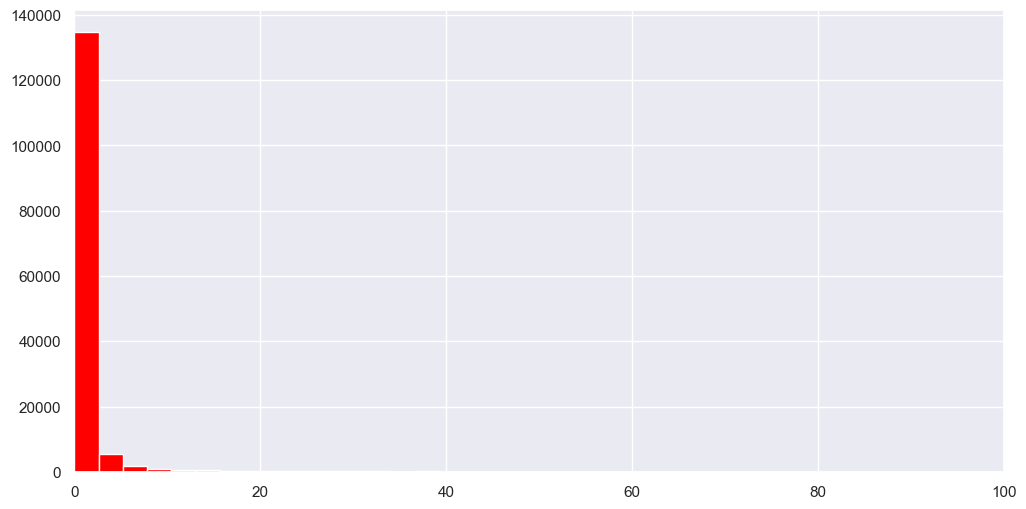

In [20]:
# 20 - посмотрим на распределение целевой переменной
train.target.hist(bins=200, color='red')
plt.xlim([0, 100])

In [21]:
# 21 - по итогу из 63 признаков осталось лишь 36
train.shape

(145906, 36)

In [22]:
# 22 - разбиваем тренировочные данные на X и y
X = train.drop(labels=['target'], axis=1)
y = train.target

In [23]:
# 23 - откроем тренировочный датасет
test = pd.read_csv('E:\Kaggle\Visor Games for Data Scientist\\test_data.csv')
test.head()

,ID,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,num_0,num_7,num_36,...,num_29,num_32,num_30,num_50,num_14,num_37,num_46,num_12,num_18,num_16
0,156919,70,6,682,4,1330,2,11.664525,15.107867,0.0,...,-1.0,183.0,1.0,40.0,21847.0,277.0,1.000000,1.000000,1.000000,1
1,114562,100,8,324,4,2301,2,NaN,0.000000,0.0,...,-1.0,131.0,1.0,20.0,1073.0,132.0,1.000000,1.000000,1.000000,1
2,311422,52,14,366,4,4307,2,NaN,0.000000,0.0,...,-1.0,199.0,1.0,11.0,810.0,201.0,0.000000,0.000000,0.000000,0
3,346476,52,0,366,0,4287,2,2.862260,3.590824,0.0,...,-1.0,170.0,1.0,20.0,37779.0,156.0,1.000000,1.000000,0.082003,0
4,86921,52,8,682,4,1351,2,NaN,0.000000,0.0,...,-1.0,676.0,1.0,34.0,162772.0,264.0,0.412376,0.417917,0.448304,1


In [24]:
# 24 - удалим в тестовых данных те же столбцы
remove_columns = ['num_0', 'num_24', 'num_27', 'num_10', *multi_colin_problem, *more_multi_colin_problem]
test.drop(columns=remove_columns, axis=1, inplace=True)

In [25]:
# 25 - фиксим ValueError: Unknown label type: ‘continuous’
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

[10476     0     0 ...     0     0     0]


In [26]:
# 26 - разбиваем тренировочный датасет на обучающий (train) для модели и валидационный (test)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_transformed,
                                                    test_size=0.2,
                                                    random_state=42)

In [27]:
# 27 - нормируем данные
mm = MinMaxScaler()
X_train_std = mm.fit_transform(X_train)
X_test_std = mm.transform(X_test)
test_std = mm.transform(test)

# Случилась проблема: пункт 28 не может обработаться и зависает, причину не удалось пока найти. Ниже в комментариях я покажу как решалась бы задача елси бы все заработало. Для примера приведу только обучение и прогноз на одной модели без использования ансамблей и другого

In [28]:
# # 28 - тренируем модель случайного леса
# clf = RandomForestClassifier(max_depth=10)
# clf.fit(X_train_std, y_train)

In [29]:
# # 29 - получаем прогноз на валидационных данных
# y_pred_train = clf.predict(X_train_std)
# y_pred_test = clf.predict(X_test_std)
# y_pred_test

In [30]:
# # 30 - вычисляем Precision, Recall, F1 and ROC-AUC метрики
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# # precision for test data
# print(f'precision: {precision_score(y_test, y_pred_test):.4f}\n')

# # precision for test data
# print(f'recall: {recall_score(y_test, y_pred_test):.4f}\n')

# # precision for test data
# print(f'F1: {f1_score(y_test, y_pred_test):.4f}\n')

# # precision for test data
# print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_test):.4f}')

In [31]:
# # P.S. другой способ вычислть метрики
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred_test))

In [32]:
# 31 - обучаем модель на тренировочных данных и делаем прогноз на тестовых
# clf = RandomForestClassifier(max_depth=5)
# clf.fit(X, y)

# y_pred_train = clf.predict(X_train_std)
# y_pred_test = clf.predict(X_test_std)
# y_pred_test

# Массив y_pred_test содержал бы прогнозные результаты

### Спасибо за внимание!